In [1]:
%pylab inline
import datetime
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_data(name):
    data = []
    for line in open(name, 'r'):
        spl = line.split('|')
        date, users = datetime.datetime.strptime(spl[1].strip(), "%Y-%m-%d"), int(spl[3].split(' ')[1].replace(',', ''))
        data.append([date, users])

    return array(data)

In [3]:
def plot_data(data, legend = None):
    plot(range(len(data)), data[:,1], label = legend)
    xticks(range(len(data)), [x.strftime("%d-%m") for x in data[:,0]],  rotation=70)

In [4]:
DATA_DIR = 'data/'
dirs = listdir(DATA_DIR)
dirs

['15-05', '10-06', '09-04']

In [5]:
convert_dir = lambda _dir: DATA_DIR + _dir + '/'
contents = lambda _dir: set(listdir(convert_dir(_dir)))

In [6]:
l = map(lambda d: set(contents(d)), dirs)
t = list(l)[0]
for d in l:
    t &= d
t & set(['rihannavevo', 'familyfunpack', 'coldplayvevo', 'watchmojo', 'jacksepticeye'])

{'coldplayvevo', 'familyfunpack', 'jacksepticeye', 'rihannavevo', 'watchmojo'}

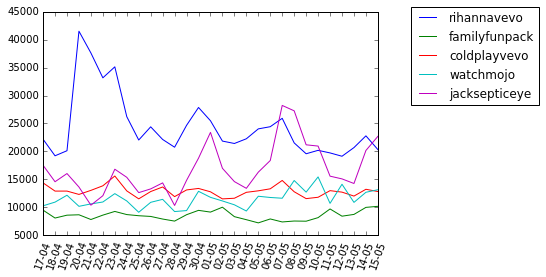

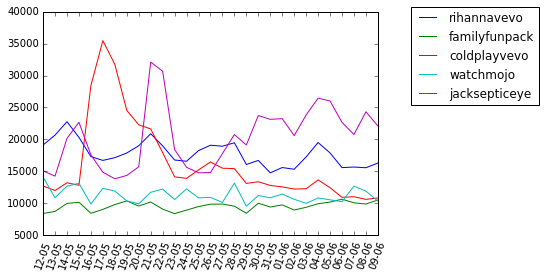

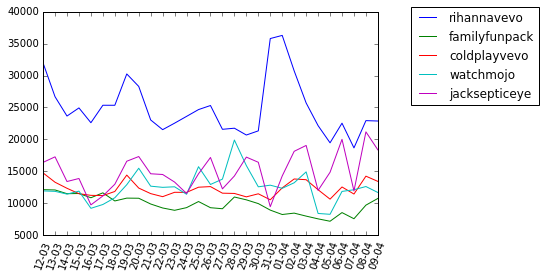

In [7]:
names = ['rihannavevo', 'familyfunpack', 'coldplayvevo', 'watchmojo', 'jacksepticeye']
# list(contents(dirs[0]) & contents(dirs[1]))[:5]
data = {}
for name in names:
    data[name] = []
for _dir in dirs:
    directory = convert_dir(_dir)
    for name in names:
        datum = read_data(directory + name)
        plot_data(datum, legend=name)
        data[name].append(datum)
    legend(bbox_to_anchor=(1.5, 1.05))
    show()

In [8]:
def level_of(a, b):
    rel_change = (b-a)/a
    sgn = sign(rel_change)
    ab_change = abs(rel_change)
    level = 0
    if ab_change > 0.1:
        level = 1
    if ab_change > 0.2:
        level = 2
    return sgn * level + 2

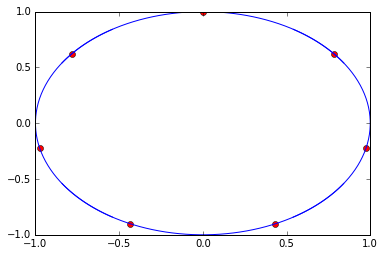

In [9]:
weekday_map = []
for j in range(7):    
    t = j*(2 * np.pi / 7)
    weekday_map += [[np.sin(t), np.cos(t)]]
weekday_map = array(weekday_map
                   )
plot(weekday_map[:, 0], weekday_map[:, 1], "ro")
mtop = np.linspace(-1, 1)
plot(np.sin(mtop), np.cos(mtop), 'b')
plot(np.cos(mtop), np.sin(mtop), 'b')
plot(np.sin(mtop), -1*np.cos(mtop), 'b')
plot(-1*np.cos(mtop), np.sin(mtop), 'b')

In [10]:
from functools import reduce
def normalize(arr):
    a = []
    pick_datapoints = lambda arr: list(map(lambda x: x[1], arr))
    arr = list(zip(*[arr[i:] for i in range(4)]))
    for i in arr:
        foo =list(weekday_map[i[0][0].weekday()])
        foo += pick_datapoints(i[:-1])
        foo += [level_of(foo[-2], foo[-1])]
        a.append(foo)
    return a

In [11]:
def extrapolate(data_points, draw_plot=False):
    data_points = data_points[2:]
    n = len(data_points)
    xs = range(n)
    v = np.poly1d(np.polyfit(xs, data_points, 1))(n)
    if draw_plot:
        plot(xs, data_points)
        plot(n, v, 'ro')
    return v

In [12]:
def plot_results(predict_fn, data_set):
    ins, outs = data_set
    data = []
    miss= 0
    for i in range(len(ins)):
        test_batch = ins[i]
        prediction = predict_fn(test_batch)
        data.append([2*i, outs[i], prediction[0]])
        if outs[i] != prediction[0]:
            miss += 1
        data.append([2*i+1, 0,0])
    data = array(data)
    figure(figsize=(12,6))
    plot(data[:, 0], data[:, 1], label='expected', color='r')
    plot(data[:, 0], data[:, 2], label='computed', color='b')
    legend()
    print("Accuracy: %g" % (1 - miss/len(ins)))

In [13]:
def guess_level(data_points):
    return [level_of(data_points[-1], extrapolate(data_points))]

In [14]:
def ingest(name):
    by_date = {}
    assert name in data, "Provide name in " + str(list(name.keys()))
    for arr in data[name]:
        for item in arr:
            by_date[item[0]] = item
    return array(normalize(sorted(list(by_date.values()), key=lambda a: a[0])))

In [15]:
%load_ext autoreload

In [16]:
%autoreload 1
%aimport prediction

/home/luki/.virtualenvs/psizwism/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [17]:
def train_network(name):
    d = ingest(name)
    plot(range(len(d)), d[:, -1])

    p = prediction.Prediction(d[:, :-1], d[:, -1])
    
    p.train()

    train, test, predict_fn = p.network_attributes()
    tr_in, te_in = prediction.Prediction.split(d[:, :-1])
    
    return [train, test, predict_fn, tr_in, te_in]

100%|██████████| 2000/2000 [00:16<00:00, 121.94it/s]


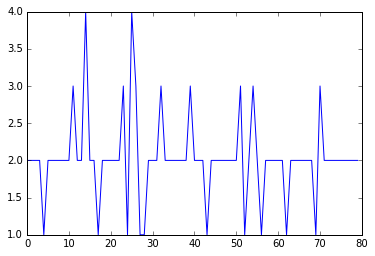

In [18]:
train, test, predict_fn, tr_in, te_in = train_network('familyfunpack')

Accuracy: 1


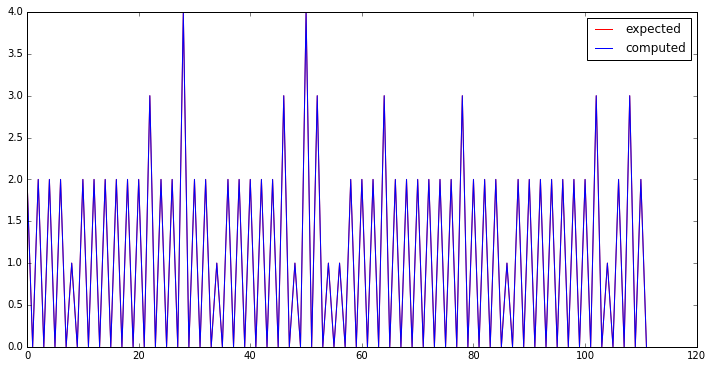

In [19]:
plot_results(predict_fn, train)

Accuracy: 0.791667


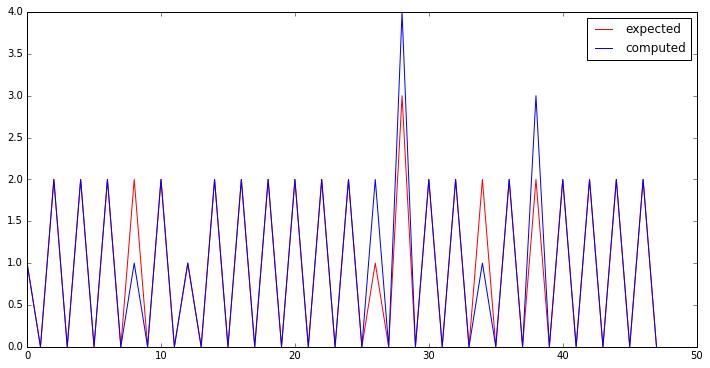

In [20]:
plot_results(predict_fn, test)

Accuracy: 0.678571


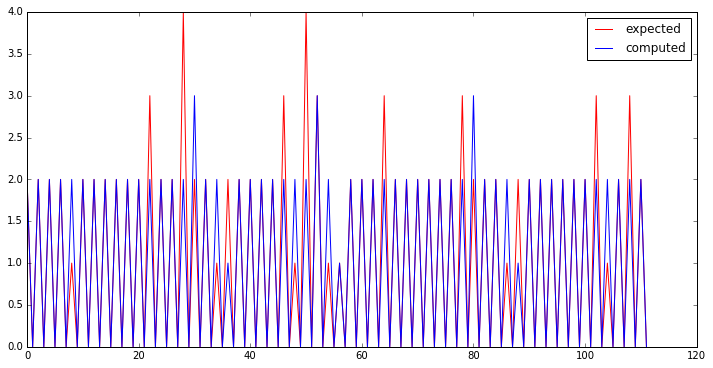

In [21]:
plot_results(guess_level, (tr_in, train[1]))

Accuracy: 0.75


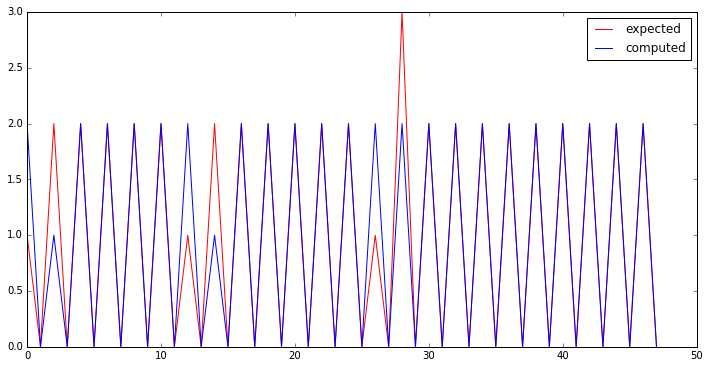

In [22]:
plot_results(guess_level, (te_in, test[1]))

100%|██████████| 2000/2000 [00:14<00:00, 135.25it/s]


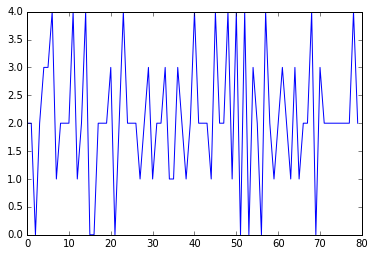

In [23]:
train, test, predict_fn, tr_in, te_in = train_network('watchmojo')

Accuracy: 1


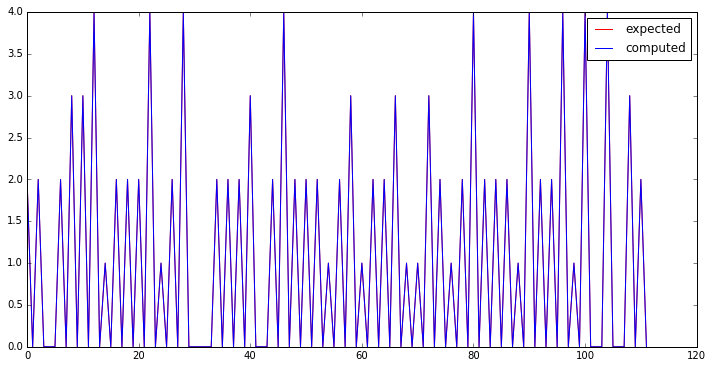

In [24]:
plot_results(predict_fn, train)

Accuracy: 0.666667


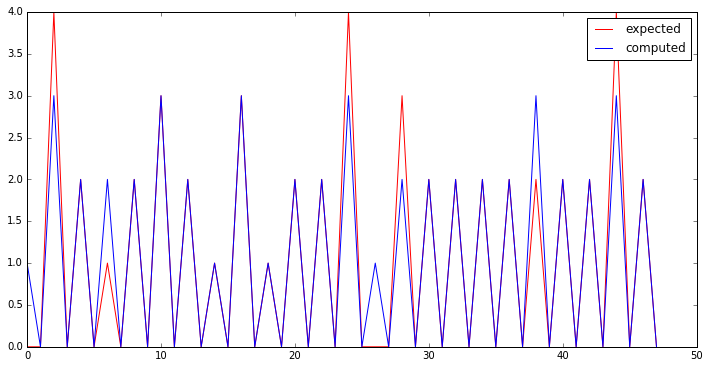

In [25]:
plot_results(predict_fn, test)

Accuracy: 0.303571


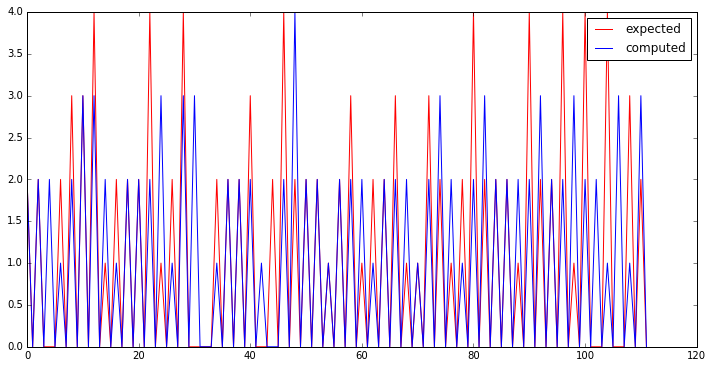

In [26]:
plot_results(guess_level, (tr_in, train[1]))

Accuracy: 0.375


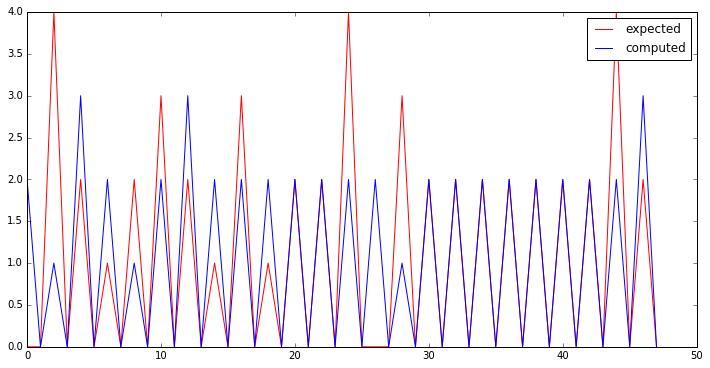

In [27]:
plot_results(guess_level, (te_in, test[1]))

100%|██████████| 2000/2000 [00:14<00:00, 134.19it/s]


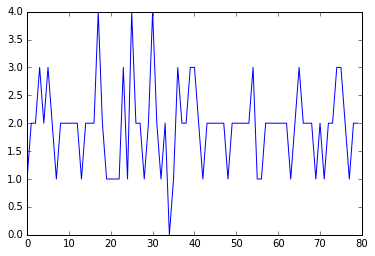

In [28]:
train, test, predict_fn, tr_in, te_in = train_network('rihannavevo')

Accuracy: 0.982143


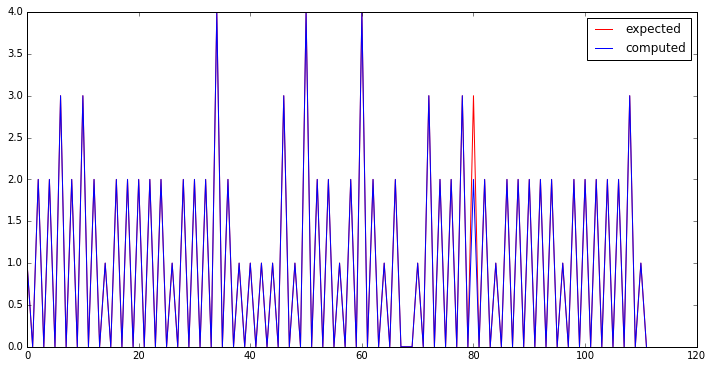

In [29]:
plot_results(predict_fn, train)

Accuracy: 0.708333


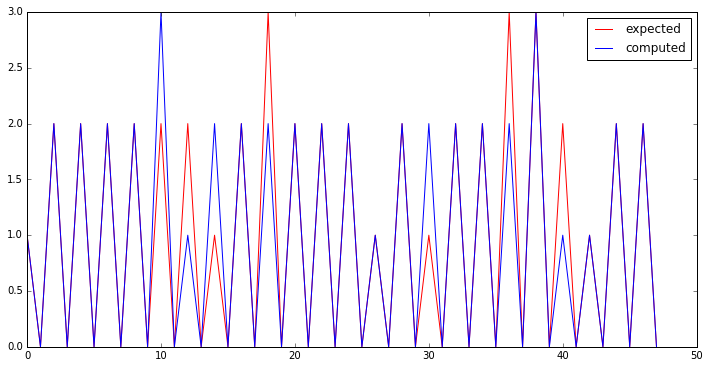

In [30]:
plot_results(predict_fn, test)

Accuracy: 0.535714


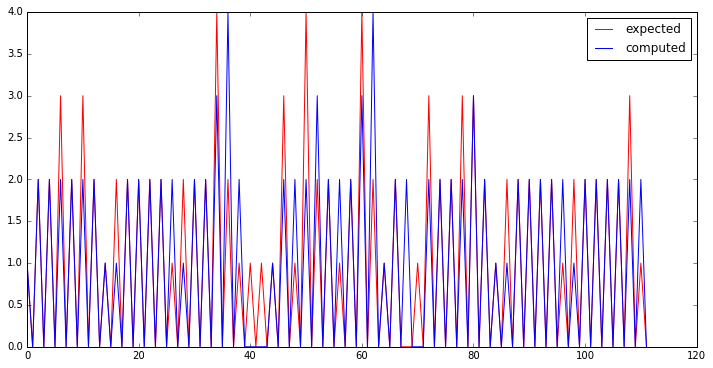

In [31]:
plot_results(guess_level, (tr_in, train[1]))

Accuracy: 0.75


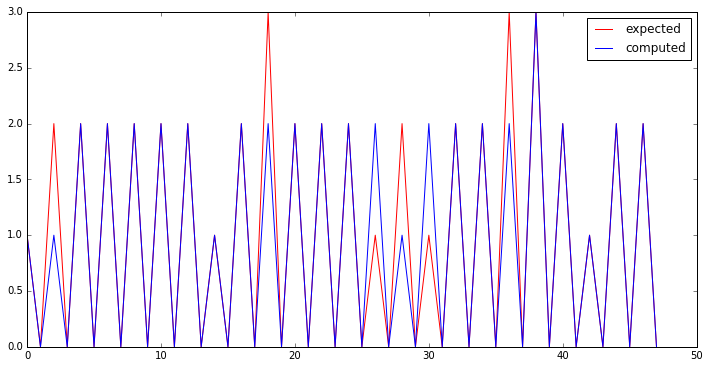

In [32]:
plot_results(guess_level, (te_in, test[1]))

100%|██████████| 2000/2000 [00:17<00:00, 111.21it/s]


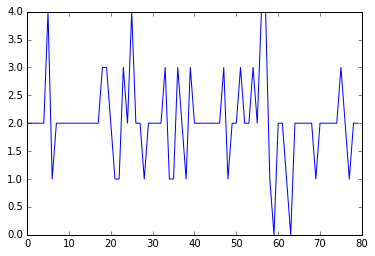

In [33]:
train, test, predict_fn, tr_in, te_in = train_network('coldplayvevo')

Accuracy: 0.839286


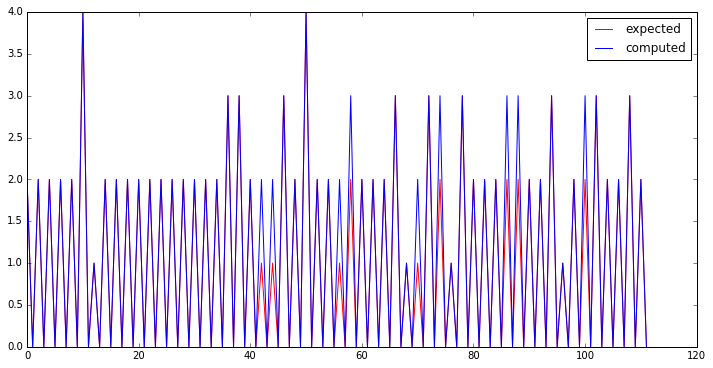

In [34]:
plot_results(predict_fn, train)

Accuracy: 0.583333


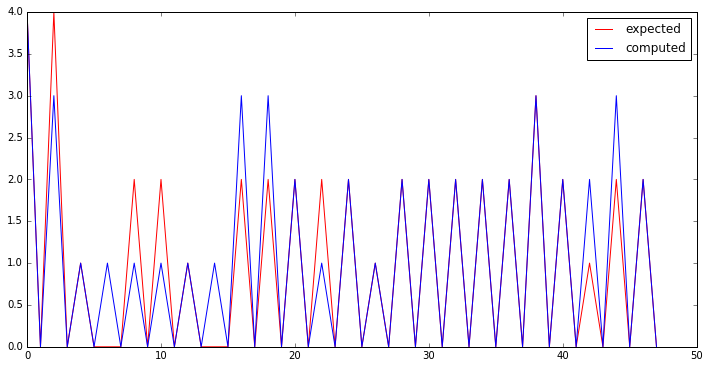

In [35]:
plot_results(predict_fn, test)

Accuracy: 0.642857


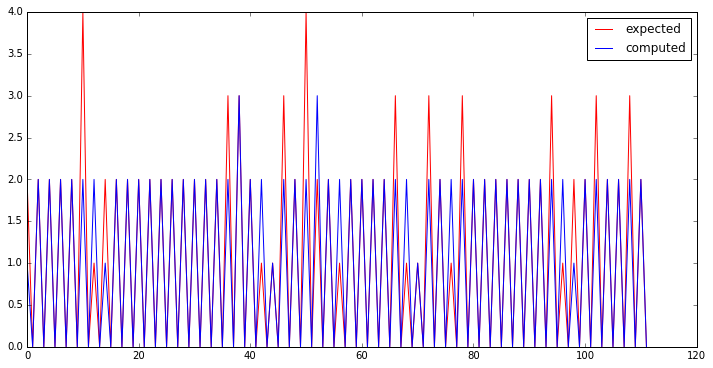

In [36]:
plot_results(guess_level, (tr_in, train[1]))

Accuracy: 0.625


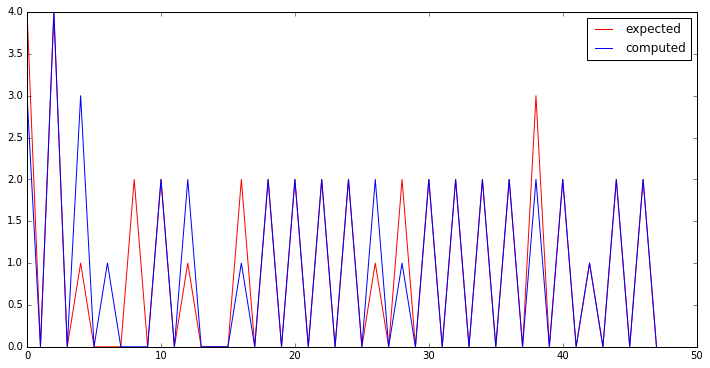

In [37]:
plot_results(guess_level, (te_in, test[1]))

100%|██████████| 2000/2000 [00:14<00:00, 140.03it/s]


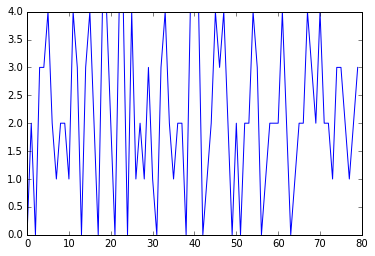

In [38]:
train, test, predict_fn, tr_in, te_in = train_network('jacksepticeye')

Accuracy: 1


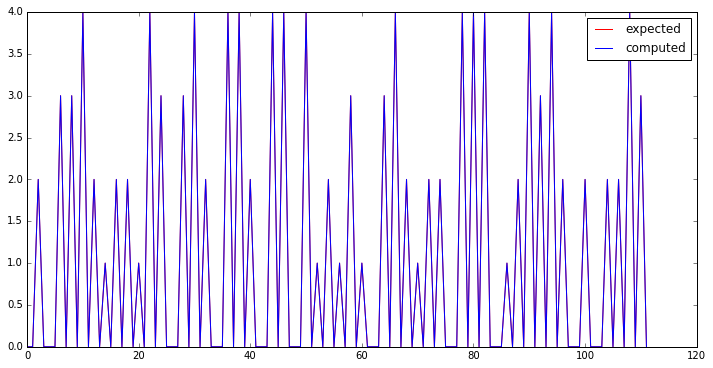

In [39]:
plot_results(predict_fn, train)

Accuracy: 0.625


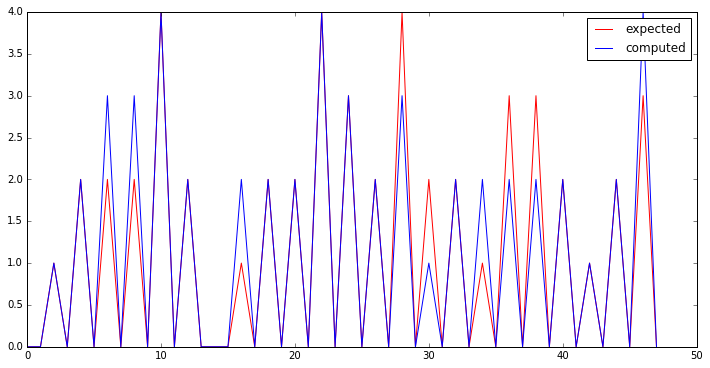

In [40]:
plot_results(predict_fn, test)

Accuracy: 0.232143


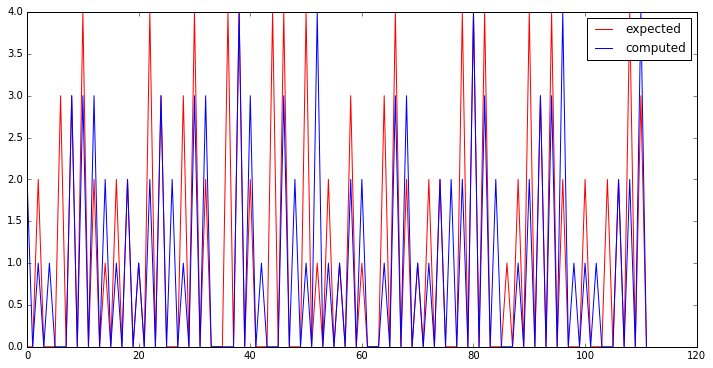

In [41]:
plot_results(guess_level, (tr_in, train[1]))

Accuracy: 0.375


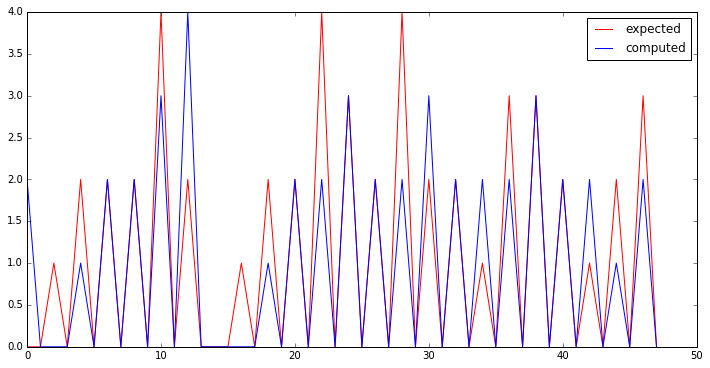

In [42]:
plot_results(guess_level, (te_in, test[1]))